In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# Assuming the dataset is in a CSV file named 'bank_dataset.csv'
df = pd.read_csv('bank-full.csv',sep=';')
df



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
# Display the first few rows of the dataset
print(df.head())



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [8]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


## Preprocess the data

In [9]:
# Assuming 'y' is the target variable
X = df.drop('y', axis=1)
y = df['y']



In [10]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)
X


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
17965,49,1415,30,269,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
18299,42,3842,31,130,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10221,37,-119,11,375,11,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32192,56,3498,15,264,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,2093,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
44732,23,508,8,210,1,92,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38158,34,1317,15,239,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
860,33,165,7,111,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3776,40,580,16,192,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
9928,47,3644,9,83,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
33409,25,538,20,226,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31885,42,1773,9,311,1,336,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15738,56,217,21,121,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,47,1890,8,161,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
38732,32,217,15,692,3,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
5654,52,0,26,206,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3779,40,783,16,171,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
y_train

3344      no
17965     no
18299     no
10221     no
32192    yes
        ... 
11284    yes
44732     no
38158     no
860       no
15795     no
Name: y, Length: 36168, dtype: object

In [15]:
y_test

3776      no
9928      no
33409     no
31885     no
15738     no
        ... 
13353     no
38732    yes
5654      no
3779      no
11677     no
Name: y, Length: 9043, dtype: object

## Standardize the feature

In [16]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
X_train

array([[ 0.00651495, -0.16938112, -0.09821817, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [ 0.75993671,  0.01784754,  1.70342239, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [ 0.10069267,  0.8206814 ,  1.82353176, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       ...,
       [-0.65272909, -0.01457014, -0.09821817, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [-0.74690681, -0.39564332, -1.05909314, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [-0.27601821, -0.46378662,  0.62243805, ..., -0.20779147,
        -0.1860456 ,  0.47280581]])

In [18]:
X_test

array([[-0.08766277, -0.25836436,  0.0218912 , ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [ 0.57158127,  0.75518445, -0.81887439, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [-1.50032857, -0.27225765,  0.50232868, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       ...,
       [ 1.04246987, -0.45022412,  1.22298491, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [-0.08766277, -0.19121344,  0.0218912 , ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [-0.37019593,  0.28049694,  0.50232868, ..., -0.20779147,
        -0.1860456 ,  0.47280581]])

## Build and train logistic regression model

In [19]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)




In [20]:
# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Prediction and evaluate the model

In [21]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)



In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8987061815769103
Confusion Matrix:
[[7755  197]
 [ 719  372]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



C:\Users\Admin\AppData\Local\Temp\ipykernel_23420\2999496713.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


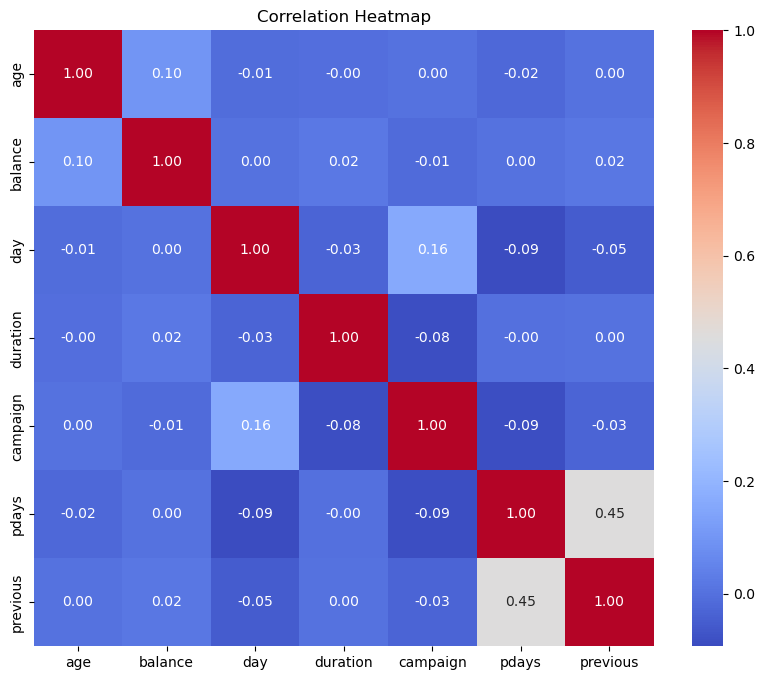

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


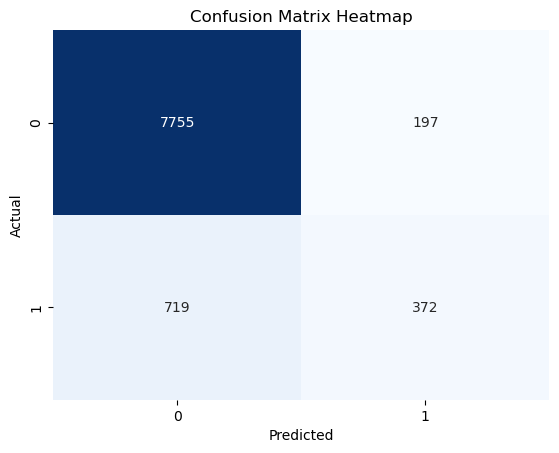

In [24]:
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


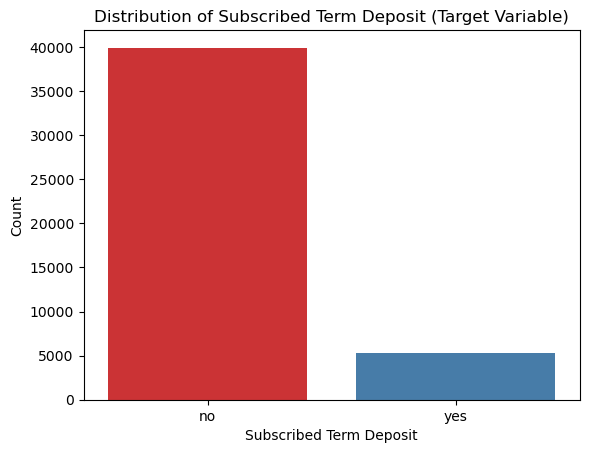

In [25]:
# Countplot of the target variable
sns.countplot(x='y', data=df, palette='Set1')
plt.title('Distribution of Subscribed Term Deposit (Target Variable)')
plt.xlabel('Subscribed Term Deposit')
plt.ylabel('Count')
plt.show()


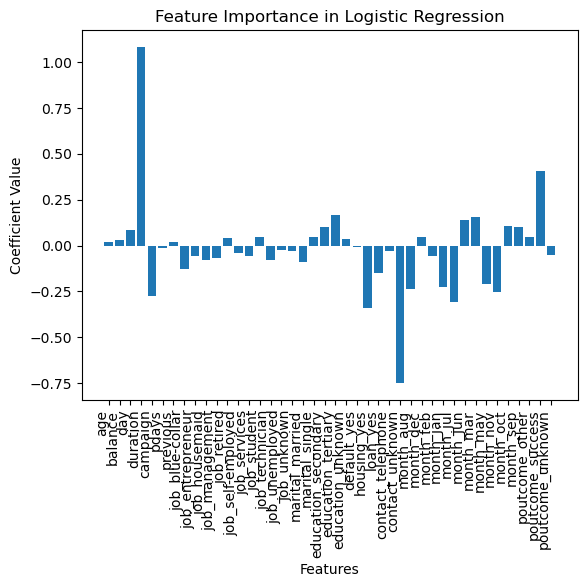

In [29]:
# Extract coefficients from the logistic regression model
coefficients = logreg_model.coef_[0]

# Create a bar chart for feature importance
plt.bar(X.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.xticks(rotation=90, ha='right')
plt.show()
